<a href="https://colab.research.google.com/github/laiqahnm/Klasifikasi-Model-DM-SENTINOVA/blob/main/Model%20Klasifikasi%20DM%20-%20SENTINOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pypmml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 31.6 MB/s eta 0:00:00


# Model Naive Bayes (rapid miner)

=== Evaluasi Model dari RapidMiner ===
   accuracy  classification error     kappa   recall  precision
0  0.949495              0.050505  0.898876  0.94955   0.949346

=== Hasil Prediksi ===
  prediction(Sentiment)  confidence(Positive)  confidence(Negative)
0              Negative              0.481962              0.518038
1              Negative              0.481962              0.518038

=== Data dan Prediksi Gabung ===
   feature1  feature2 prediction(Sentiment)  confidence(Positive)  \
0       2.5       0.5              Negative              0.481962   
1       1.0       1.2              Negative              0.481962   

   confidence(Negative)  
0              0.518038  
1              0.518038  


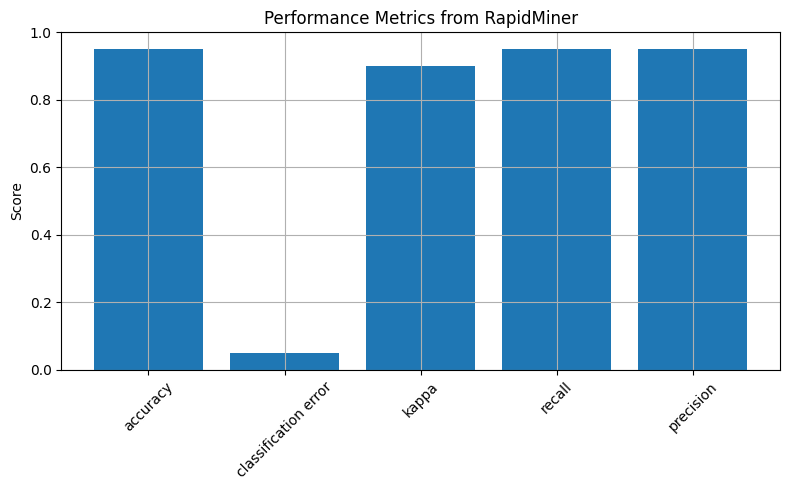

In [ ]:
import pandas as pd
from pypmml import Model
import matplotlib.pyplot as plt

# Load model PMML
model = Model.load('model naive bayes.pmml')

#  Perbaikan pembacaan file hasil log
with open('performance naive bayes.csv', 'r') as file:
    lines = file.readlines()

columns = header_line.split('\t')
values = value_line.split('\t')

# Buat dataframe
eval_df = pd.DataFrame([values], columns=columns)
eval_df = eval_df.astype(float)

print("=== Evaluasi Model dari RapidMiner ===")
print(eval_df)

# Uji prediksi model dengan data baru
sample_data = pd.DataFrame([
    {'feature1': 2.5, 'feature2': 0.5},
    {'feature1': 1.0, 'feature2': 1.2}
])

predictions = model.predict(sample_data)
print("\n=== Hasil Prediksi ===")
print(predictions)

combined = pd.concat([sample_data, predictions], axis=1)
print("\n=== Data dan Prediksi Gabung ===")
print(combined)

plt.figure(figsize=(8, 5))
plt.bar(eval_df.columns, eval_df.iloc[0])
plt.title("Performance Metrics from RapidMiner")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Naive Bayes dengan Format PKL

In [6]:
import pandas as pd

# load dataset (udah difilter elektronik dari data prdictid)
data = pd.read_csv("/content/data prdict filter.csv", sep=';')
data = data[['Review Customer', 'Sentiment']]
data.dropna(inplace=True)

data.head()

,Review Customer,Sentiment
0,alhamdulilah berfungsi dengan baik packaging a...,Positive
1,barang bagus dan respon cepat harga bersaing d...,Positive
2,barang bagus berfungsi dengan baik seler ramah...,Positive
3,bagus sesuai harapan penjual nya juga ramah tr...,Positive
4,barang bagus pengemasan aman dapat berfungsi d...,Positive


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# membangun ulang model dan pipeline tf idf + naive bayes
X = data['Review Customer']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

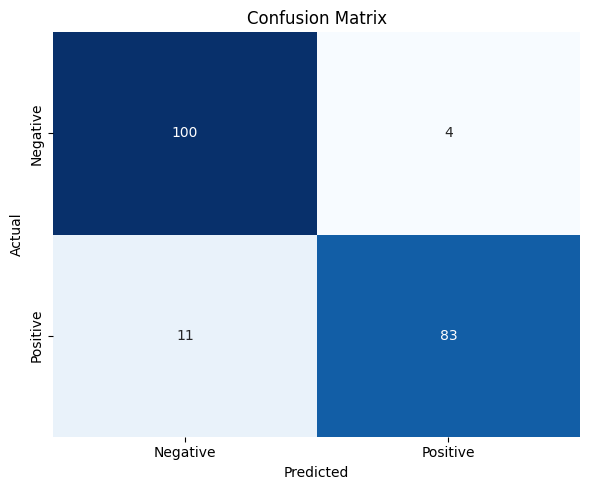

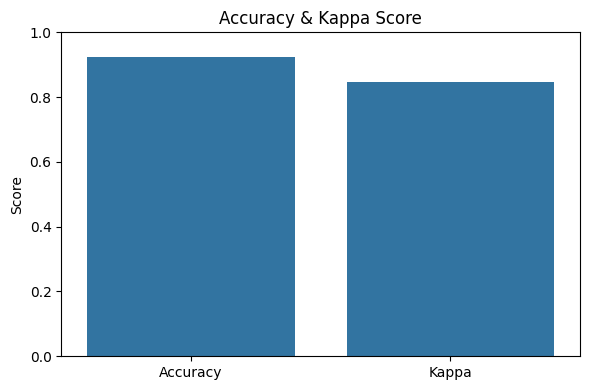

<Figure size 1000x600 with 0 Axes>

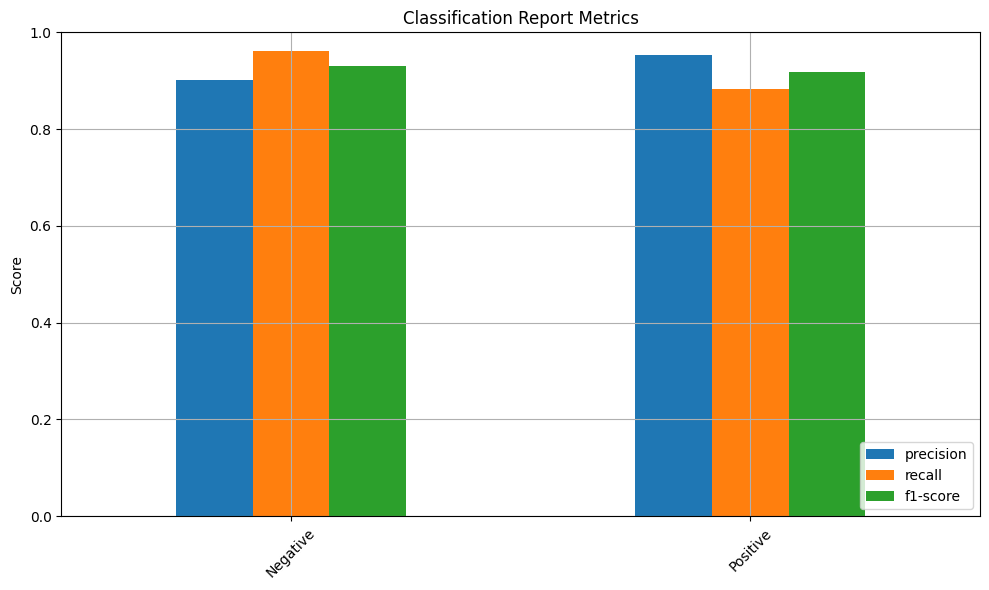

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, confusion_matrix

# Prediksi dan Evaluasi
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 1. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 2. Barplot Accuracy & Kappa
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'Kappa'], y=[accuracy, kappa])
plt.ylim(0, 1)
plt.title('Accuracy & Kappa Score')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# 3. Classification Report Metrics
report_df = pd.DataFrame(report).transpose()
# Drop metrics yang bukan per kelas
report_df_class = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(10, 6))
ax = report_df_class[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Test Input Ulasan

In [10]:
import joblib
# menyimpan model dalam format pkl
joblib.dump(model, "model_dm.pkl")

['model_dm.pkl']

In [11]:
model = joblib.load("model_dm.pkl")

ulasan = "barang sampai dengan kondisi baik dan aman, bagus sekali"

# Prediksi
hasil = model.predict([ulasan])[0]
probas = model.predict_proba([ulasan])[0]
confidence = {str(label): round(float(p), 3) for label, p in zip(model.classes_, probas)}

# Evaluasi
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print("📌 Ulasan:", ulasan)
print("🔍 Prediksi Sentimen:", hasil)
print("📊 Confidence:", confidence)
print("📈 Akurasi Model:", f"{accuracy:.2%}")
print("📉 Kappa Score:", f"{kappa:.3f}")
print("📑 Evaluasi Lengkap:")
for label in ['Positive', 'Negative']:
    if label in report:
        print(f" - {label}:")
        print(f"   Precision: {report[label]['precision']:.2f}")
        print(f"   Recall   : {report[label]['recall']:.2f}")
        print(f"   F1-Score : {report[label]['f1-score']:.2f}")


📌 Ulasan: barang sampai dengan kondisi baik dan aman, bagus sekali
🔍 Prediksi Sentimen: Positive
📊 Confidence: {'Negative': 0.142, 'Positive': 0.858}
📈 Akurasi Model: 92.42%
📉 Kappa Score: 0.848
📑 Evaluasi Lengkap:
 - Positive:
   Precision: 0.95
   Recall   : 0.88
   F1-Score : 0.92
 - Negative:
   Precision: 0.90
   Recall   : 0.96
   F1-Score : 0.93
